/home/yustiks/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/yustiks/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


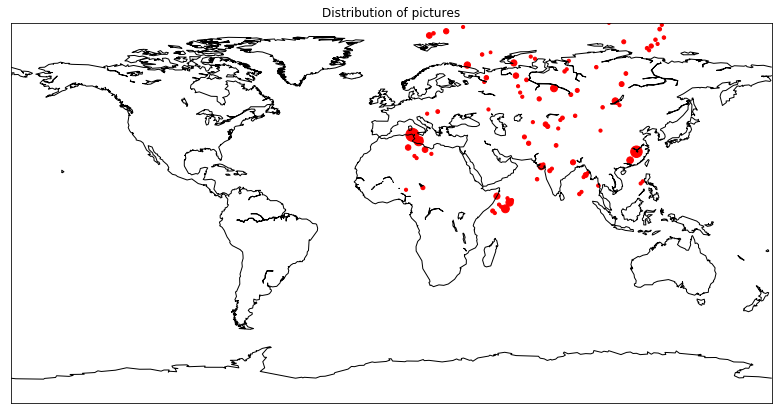

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from itertools import chain
import pandas as pd
import operator 

# import all the latitude and longitude information and plot on the map
# fp = open('/home/yustiks/Documents/data mining/project/test1_gt.txt','r')

d = dict()
lat = []
lon = []
counts = []

filepath = './Documents/data mining/project/data_mining/test1_gt.txt'  
with open(filepath) as fp:  
    line = fp.readline()
    line = fp.readline()
    lst = line.split()
    
    cnt = 1
    while line:
        lat1 = format(float(lst[1]), '.6f')
        lon1 = format(float(lst[2]), '.6f')
        t = (lat1, lon1)
        if t in d:
            d[t] += 1
        else:
            d[t] = 1
        line = fp.readline()
        lst = line.split()
        cnt += 1
# fp.close()

sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse = True)

for key in sorted_d:
    lat.append(key[0][0])
    lon.append(key[0][1])
    counts.append(key[1])
    if key[1]==8:
        break
        
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
fig = plt.figure(figsize=(15,7))
m.drawcoastlines()
#m.drawmapboundary(fill_color='white')
plt.title('Distribution of pictures')


x, y = m(lon,lat)
size = (counts)
m.scatter(x,y,s=size,marker='o',color='r')


In [3]:
file='tags.csv'
print (pd.read_csv(file, nrows=5))

                                           photoTags
0  france landscape geotagged infrared provence r...
1  france landscape geotagged provence rhônealpes...
2  italy 35mm volcano ruins campania kodak scanne...
3  italy 35mm ruins campania kodak scanned pompei...
4  35mm boats fishing kodak croatia scanned kodac...


In [22]:
import pandas as pd
import operator
d = {}
df = pd.read_csv(file)
list1 = df['photoTags'].str.split(' ')
d = {}
for el_list in list1:
    for el in el_list:
        if el in d:
            d[el] += 1
        else:
            d[el] = 1
sorted_x = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
print(len(sorted_x))

254734


In [33]:
i = 0
for key in d:
    print(key)
    i+=1
    if i == 1000:
        break

france
landscape
geotagged
infrared
provence
rhônealpes
aplusphoto
flickrchallengegroup
tencin
146kmtotencininrhônealpesfrance
geo:lat=45325450
geo:lon=5952700
161kmtotencininrhônealpesfrance
geo:lat=45328833
geo:lon=5955600
italy
35mm
volcano
ruins
campania
kodak
scanned
pompeii
vesuvius
kodachrome
asa64
boats
fishing
croatia
dubrovnik
yugoslavia
church
buildings
germany
cathedral
dom
cologne
koeln
koln
orange
bird
animals
zoo
sandiego
evil
colourful
evileye
malevolent
barcelona
spain
europe
christmas
brussels
tree
night
belgium
agfa
asa200
grandeplace
agfacolor
sunset
docks
seaside
tallinn
estonia
baltic
shipyard
ektachrome
asa100
kirik
holyghost
pühavaimu
trees
holland
netherlands
amsterdam
canal
fujifilm
fujichrome
jordaan
waterways
usa
newyork
manhattan
taxi
empirestatebuilding
kodakgold
madisonsquare
munich
spires
munchen
muenchen
empirestate
sea
boat
fishingboat
derelict
chathams
airplanes
飛行機
bech
southafrica
gorge
oribi
california
family
vacation
squawvalley
ashby
october2007v